In [1]:
from pyincore import InsecureIncoreClient
from pyincore.analyses.waterfacilitydamage import WaterFacilityDamage

In [2]:
client = InsecureIncoreClient("http://incore2-services.ncsa.illinois.edu:8888", "incrtest")

In [3]:
hazard_type = "earthquake"
hazard_id = "5b902cb273c3371e1236b36b" # Memphis eq
facility_datasetid = "5a284f2ac7d30d13bc081e52" # Memphis water facilities dataset id

In [4]:
#mapping_id = "5b47c3b1337d4a387e85564b"  # Hazus Potable Water Facility Fragility Mapping - Only PGA
mapping_id = "5b47c383337d4a387669d592" #Potable Water Facility Fragility Mapping for INA - Has PGD

In [5]:
#liq_geology_dataset_id = None
liq_geology_dataset_id =  "5a284f53c7d30d13bc08249c"

In [6]:
uncertainty = False
liquefaction = True
liq_fragility_key = "pgd"

In [7]:
wf_dmg = WaterFacilityDamage(client)
wf_dmg.load_remote_input_dataset("water_facilities", facility_datasetid)

In [8]:
wf_dmg.set_parameter("hazard_type", hazard_type)
wf_dmg.set_parameter("hazard_id", hazard_id)
wf_dmg.set_parameter("mapping_id", mapping_id)
wf_dmg.set_parameter("fragility_key", "pga")
wf_dmg.set_parameter("use_liquefaction", liquefaction)
wf_dmg.set_parameter("liquefaction_geology_dataset_id", liq_geology_dataset_id)
wf_dmg.set_parameter("liquefaction_fragility_key", liq_fragility_key)
wf_dmg.set_parameter("use_hazard_uncertainty", uncertainty)
wf_dmg.set_parameter("num_cpu", 4)

True

In [9]:
result_name = "wf-dmg-results.csv"
wf_dmg.set_parameter("result_name", result_name)

True

In [10]:
wf_dmg.run_analysis()

True

# Visualize output

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('wf-dmg-results.csv', delimiter=',')

In [16]:
df.columns = [col.replace('-', '_') for col in df.columns]

In [17]:
#Convert ouput to plottable format
lstName = []
lstVal = []
for i, row in df.iterrows():
    for j, column in row.iteritems():
        if(j in ["none", "slight_mod", "ext_comple", "complete"]):
            lstName.append(j)
            lstVal.append(column)

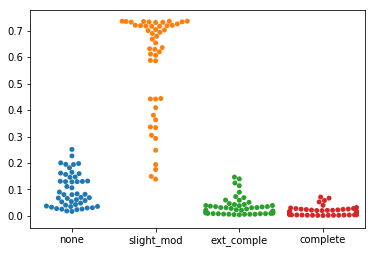

In [18]:
sns.swarmplot(x=lstName, y=lstVal)
plt.show()

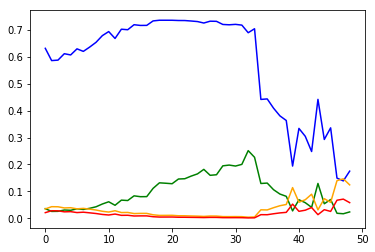

In [19]:
#Default Line plot

df.none.plot(color='g')
df.slight_mod.plot(color='b')
df.ext_comple.plot(color='orange')
df.complete.plot(color='r')